In [95]:
# Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
%matplotlib inline
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import re
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTETomek

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

smt = SMOTETomek(sampling_strategy='auto')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
#Dataset reading with Pandas
df=pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
#Taking Clothing ID 1078 dataframe as it has maximum number of reviews.
df=df[df["Clothing ID"]==1078]
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
69,69,1078,56,Great summer fabric!,"I really wanted this to work. alas, it had a s...",3,0,1,General Petite,Dresses,Dresses
90,90,1078,51,Sweet flattering dress,"I love cute summer dresses and this one, espec...",4,1,0,General Petite,Dresses,Dresses
117,117,1078,32,NaN,This is the perfect summer dress. it can be dr...,5,1,2,General Petite,Dresses,Dresses
467,467,1078,61,Great sweater dress!,"Nice fit and flare style, not clingy at all. i...",5,1,1,General,Dresses,Dresses
470,470,1078,33,"Cute, but cheap",When i first opened this dress and tried it on...,3,0,0,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...,...
22994,22994,1078,51,NaN,This is a beautiful dress and fits well. the e...,5,1,1,General Petite,Dresses,Dresses
22998,22998,1078,36,Flattering and unique,"Beautiful, unique design. it's very flattering...",4,1,2,General Petite,Dresses,Dresses
23004,23004,1078,54,Breathtaking!,This is the most beautiful dress i've ever own...,5,1,0,General,Dresses,Dresses
23460,23460,1078,34,Such high hopes!,I purchased this for a very good price and i t...,3,0,0,General,Dresses,Dresses


In [127]:
#Droping "Unmaned: 0" column
df=df.drop(labels=['Unnamed: 0'], axis=1)

In [128]:
#Checking column names
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [129]:
#Checking Dataframe information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 69 to 23465
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              1024 non-null   int64 
 1   Age                      1024 non-null   int64 
 2   Title                    871 non-null    object
 3   Review Text              987 non-null    object
 4   Rating                   1024 non-null   int64 
 5   Recommended IND          1024 non-null   int64 
 6   Positive Feedback Count  1024 non-null   int64 
 7   Division Name            1024 non-null   object
 8   Department Name          1024 non-null   object
 9   Class Name               1024 non-null   object
dtypes: int64(5), object(5)
memory usage: 88.0+ KB


In [130]:
#Checking null values
df.isnull().sum()

Clothing ID                  0
Age                          0
Title                      153
Review Text                 37
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name                0
Department Name              0
Class Name                   0
dtype: int64

In [131]:
#Droping rows based on "Review Text" column null values
df = df[df['Review Text'].notna()]
df


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
69,1078,56,Great summer fabric!,"I really wanted this to work. alas, it had a s...",3,0,1,General Petite,Dresses,Dresses
90,1078,51,Sweet flattering dress,"I love cute summer dresses and this one, espec...",4,1,0,General Petite,Dresses,Dresses
117,1078,32,NaN,This is the perfect summer dress. it can be dr...,5,1,2,General Petite,Dresses,Dresses
467,1078,61,Great sweater dress!,"Nice fit and flare style, not clingy at all. i...",5,1,1,General,Dresses,Dresses
470,1078,33,"Cute, but cheap",When i first opened this dress and tried it on...,3,0,0,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...
22994,1078,51,NaN,This is a beautiful dress and fits well. the e...,5,1,1,General Petite,Dresses,Dresses
22998,1078,36,Flattering and unique,"Beautiful, unique design. it's very flattering...",4,1,2,General Petite,Dresses,Dresses
23004,1078,54,Breathtaking!,This is the most beautiful dress i've ever own...,5,1,0,General,Dresses,Dresses
23460,1078,34,Such high hopes!,I purchased this for a very good price and i t...,3,0,0,General,Dresses,Dresses


In [132]:
df.isnull().sum()

Clothing ID                  0
Age                          0
Title                      116
Review Text                  0
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name                0
Department Name              0
Class Name                   0
dtype: int64

In [133]:
#Checking dataframe shape
df.shape

(987, 10)

# **EDA (Expolratory Data Analysis)**

Text(0.5, 1.0, 'Age Distribution in Data')

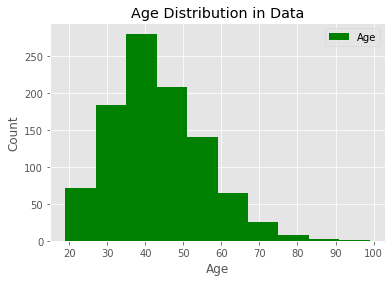

In [134]:
# The age distribution in data
plt.hist(df['Age'], color="green", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Data")

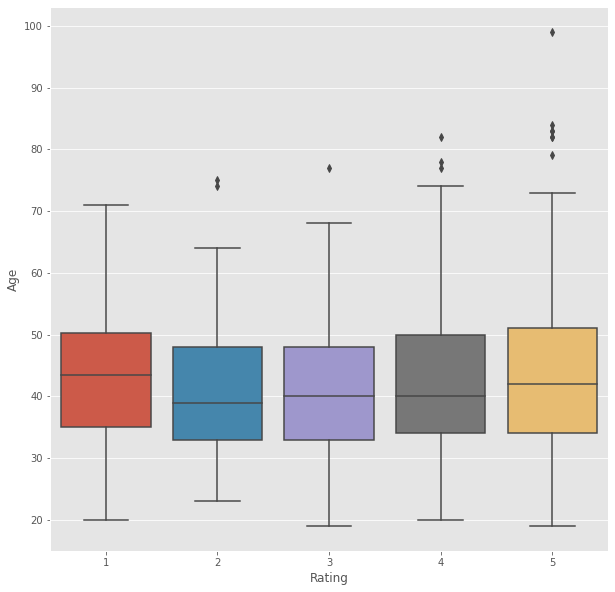

In [135]:
#Ratings based on Age
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Rating', y = 'Age', data = df)

Text(0.5, 1.0, 'Distribution of Rating')

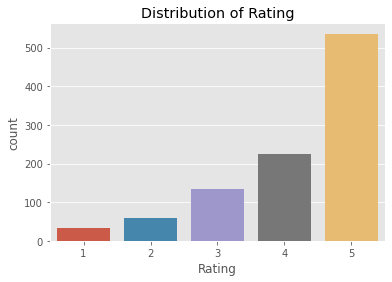

In [136]:
# Ratings Distribution in Dataset
sns.countplot(x='Rating',data=df)
plt.title("Distribution of Rating")

In [137]:
# Finding the Review text length and creating new column as "Review Length"
df["Title"]=df["Title"].fillna(" ")
df['Review Text']=df["Title"]+" "+df["Review Text"]
df['Review Length'] = df['Review Text'].astype(str).apply(len)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
69,1078,56,Great summer fabric!,Great summer fabric! I really wanted this to w...,3,0,1,General Petite,Dresses,Dresses,290
90,1078,51,Sweet flattering dress,Sweet flattering dress I love cute summer dres...,4,1,0,General Petite,Dresses,Dresses,414
117,1078,32,,This is the perfect summer dress. it can be ...,5,1,2,General Petite,Dresses,Dresses,296
467,1078,61,Great sweater dress!,"Great sweater dress! Nice fit and flare style,...",5,1,1,General,Dresses,Dresses,198
470,1078,33,"Cute, but cheap","Cute, but cheap When i first opened this dress...",3,0,0,General,Dresses,Dresses,473


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


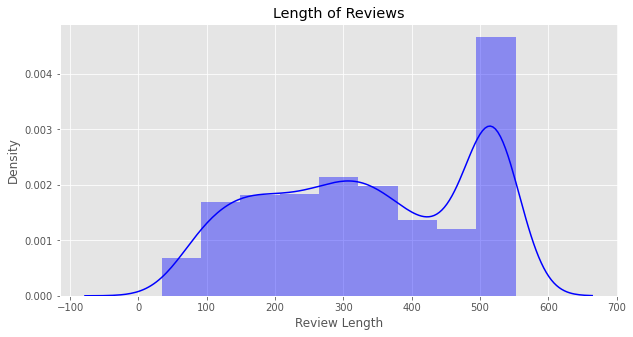

In [138]:
#Review text length distribution
fig = plt.figure(figsize=(10, 5))
ax = sns.distplot(df['Review Length'], color="blue")
ax = plt.title("Length of Reviews")

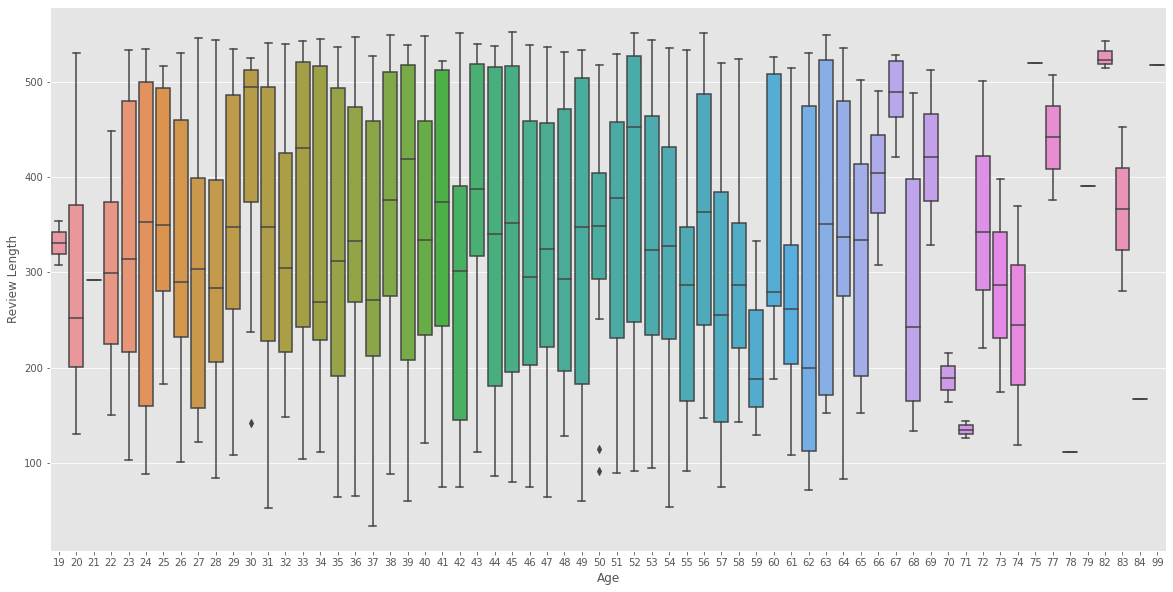

In [139]:
#Review length with respect to Age
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Age', y = 'Review Length', data = df)

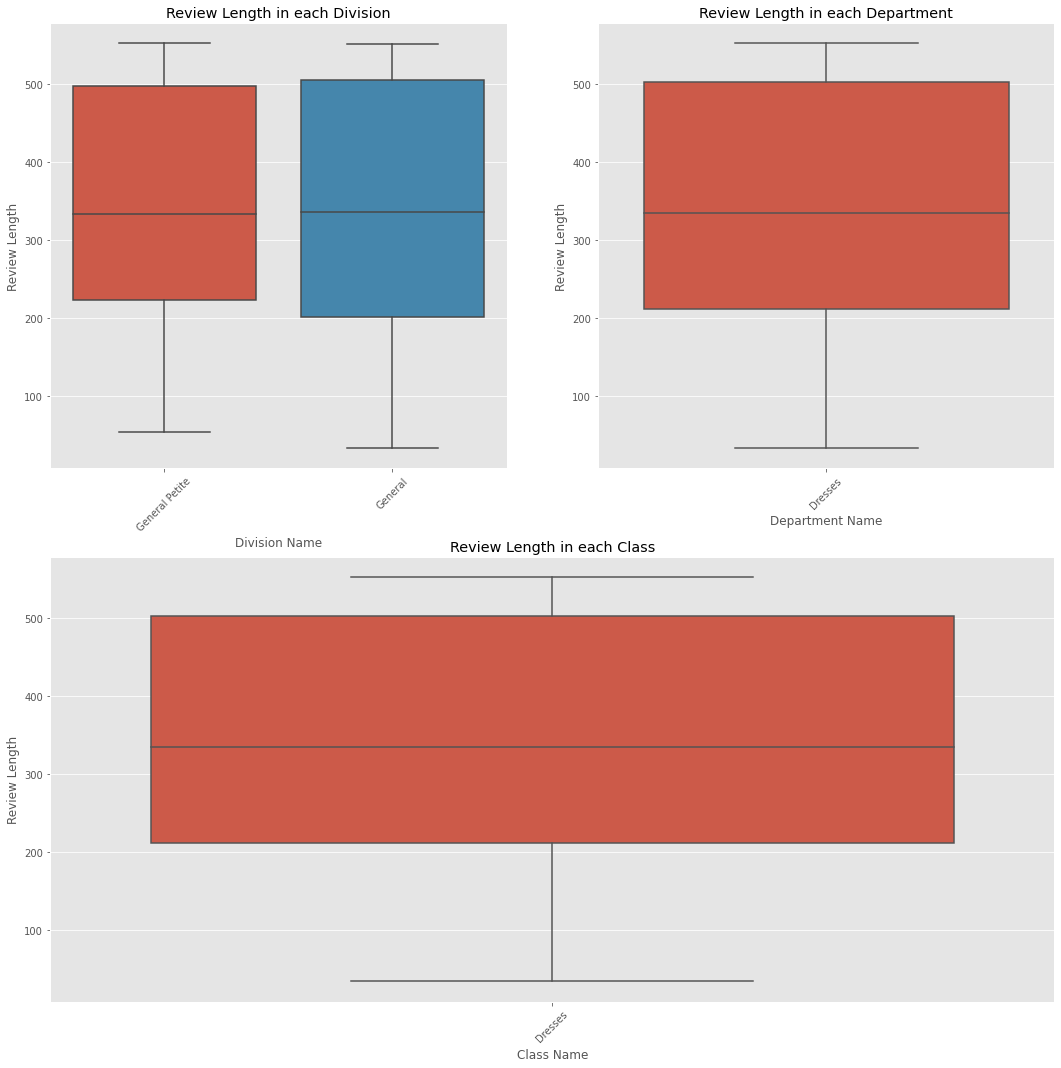

In [140]:
#Review Length in each Division

plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.boxplot(x = 'Division Name', y = 'Review Length', data = df)
ax1 = plt.title("Review Length in each Division")
#Review Length in each Department
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.boxplot(x = 'Department Name', y = 'Review Length', data = df)
ax2 = plt.title("Review Length in each Department")
#Review Length in each Class
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x = 'Class Name', y = 'Review Length', data = df)
ax3 = plt.title("Review Length in each Class")

# **Review Analysis**

In [141]:
#PorterStemmer is using for Stemming for "Review Text" column
ps = PorterStemmer()
Reviews = df['Review Text'].astype(str)
print(Reviews.shape)
Reviews[Reviews.isnull()] = "NULL"

(987,)


In [142]:
# Cleaning data
#Which includes removing special characters and English Stopwords
tokenizer = RegexpTokenizer(r'[a-zA-Z]{3,}')
stop_words = set(stopwords.words('english'))

In [143]:
df['tokenized'] = df["Review Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row

In [144]:
#Converting list of tokens into string with new column name "tokenized_unlist"
def string_unlist(strlist):
    return " ".join(strlist)

df["tokenized_unlist"] = df["tokenized"].apply(string_unlist)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist
69,1078,56,Great summer fabric!,Great summer fabric! I really wanted this to w...,3,0,1,General Petite,Dresses,Dresses,290,"[great, summer, fabric, really, wanted, work, ...",great summer fabric really wanted work alas st...
90,1078,51,Sweet flattering dress,Sweet flattering dress I love cute summer dres...,4,1,0,General Petite,Dresses,Dresses,414,"[sweet, flattering, dress, love, cute, summer,...",sweet flattering dress love cute summer dresse...
117,1078,32,,This is the perfect summer dress. it can be ...,5,1,2,General Petite,Dresses,Dresses,296,"[perfect, summer, dress, dressed, quality, lin...",perfect summer dress dressed quality linen fab...
467,1078,61,Great sweater dress!,"Great sweater dress! Nice fit and flare style,...",5,1,1,General,Dresses,Dresses,198,"[great, sweater, dress, nice, fit, flare, styl...",great sweater dress nice fit flare style cling...
470,1078,33,"Cute, but cheap","Cute, but cheap When i first opened this dress...",3,0,0,General,Dresses,Dresses,473,"[cute, cheap, first, opened, dress, tried, tho...",cute cheap first opened dress tried thought ad...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,1078,51,,This is a beautiful dress and fits well. the...,5,1,1,General Petite,Dresses,Dresses,90,"[beautiful, dress, fits, well, embroidery, del...",beautiful dress fits well embroidery delicate ...
22998,1078,36,Flattering and unique,"Flattering and unique Beautiful, unique design...",4,1,2,General Petite,Dresses,Dresses,522,"[flattering, unique, beautiful, unique, design...",flattering unique beautiful unique design flat...
23004,1078,54,Breathtaking!,Breathtaking! This is the most beautiful dress...,5,1,0,General,Dresses,Dresses,275,"[breathtaking, beautiful, dress, ever, owned, ...",breathtaking beautiful dress ever owned detail...
23460,1078,34,Such high hopes!,Such high hopes! I purchased this for a very g...,3,0,0,General,Dresses,Dresses,517,"[high, hopes, purchased, good, price, typicall...",high hopes purchased good price typically love...


In [145]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# doc = nlp(u''''great dress tunic colors vibrant photo indicates indeed though dress short pair well leggings boots like dress highlights hour glass figure generous nod curves accommodating skater skirt love easy wear casually work appropriate sale price huge bonus''')
# # nlp = spacy.load('en_core_web_sm')
# # doc = nlp(text)
# review_tags=[]
# for token in doc:
  
  
#   data=(token, token.pos_)
#   review_tags.append(data)
# print(review_tags)

# **Sentiment Analysis**

In [146]:
# VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
# It is available in the NLTK package and can be applied directly to unlabeled text data.
#Based on Polarity score
#Classifying "Review text" as Positive , Negative and Neutral
#After wordcloud visualisation,Combined Neutral reviews with Negative Reviews
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()
df['Polarity Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["tokenized_unlist"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Assuming that Polarity score >0 as Positive
#And Polarity Score <=0 as Negative
#Creating new column with the name "Sentiment" which contains Positive and Negative Values

df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']<=0,'Sentiment']='Negative'
# df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [147]:
#Labeling Positive and Negative values as 1,0 and storing in new column "label"
conditions = [
    df['Sentiment'] == "Positive",
    df['Sentiment'] == "Negative",]
    # df['Sentiment'] == "Neutral"]
choices = [1,0]
df['label'] = np.select(conditions, choices)



In [148]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,label
69,1078,56,Great summer fabric!,Great summer fabric! I really wanted this to w...,3,0,1,General Petite,Dresses,Dresses,290,"[great, summer, fabric, really, wanted, work, ...",great summer fabric really wanted work alas st...,0.9191,0.428,0.147,0.425,Positive,1
90,1078,51,Sweet flattering dress,Sweet flattering dress I love cute summer dres...,4,1,0,General Petite,Dresses,Dresses,414,"[sweet, flattering, dress, love, cute, summer,...",sweet flattering dress love cute summer dresse...,0.9595,0.526,0.047,0.427,Positive,1
117,1078,32,,This is the perfect summer dress. it can be ...,5,1,2,General Petite,Dresses,Dresses,296,"[perfect, summer, dress, dressed, quality, lin...",perfect summer dress dressed quality linen fab...,0.9246,0.569,0.000,0.431,Positive,1
467,1078,61,Great sweater dress!,"Great sweater dress! Nice fit and flare style,...",5,1,1,General,Dresses,Dresses,198,"[great, sweater, dress, nice, fit, flare, styl...",great sweater dress nice fit flare style cling...,0.9231,0.557,0.000,0.443,Positive,1
470,1078,33,"Cute, but cheap","Cute, but cheap When i first opened this dress...",3,0,0,General,Dresses,Dresses,473,"[cute, cheap, first, opened, dress, tried, tho...",cute cheap first opened dress tried thought ad...,0.8519,0.486,0.171,0.343,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,1078,51,,This is a beautiful dress and fits well. the...,5,1,1,General Petite,Dresses,Dresses,90,"[beautiful, dress, fits, well, embroidery, del...",beautiful dress fits well embroidery delicate ...,0.8225,0.294,0.000,0.706,Positive,1
22998,1078,36,Flattering and unique,"Flattering and unique Beautiful, unique design...",4,1,2,General Petite,Dresses,Dresses,522,"[flattering, unique, beautiful, unique, design...",flattering unique beautiful unique design flat...,0.9643,0.660,0.000,0.340,Positive,1
23004,1078,54,Breathtaking!,Breathtaking! This is the most beautiful dress...,5,1,0,General,Dresses,Dresses,275,"[breathtaking, beautiful, dress, ever, owned, ...",breathtaking beautiful dress ever owned detail...,0.9451,0.482,0.000,0.518,Positive,1
23460,1078,34,Such high hopes!,Such high hopes! I purchased this for a very g...,3,0,0,General,Dresses,Dresses,517,"[high, hopes, purchased, good, price, typicall...",high hopes purchased good price typically love...,0.9393,0.510,0.129,0.361,Positive,1


In [149]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import Tree
from nltk import pos_tag
from nltk.chunk import RegexpParser
from nltk import ne_chunk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
def tokenizer_master(sentence):
    STOPWORDS = set(stopwords.words('english'))
    text =  ' '.join([word for word in sentence.split() if word not in STOPWORDS])
    sentss = sent_tokenize(text.lower())
    
   
    sentss2 = []
    for each_sent in sentss:
        sentss2.extend([word_tokenize(each_sent)])
    # print("sentss2",sentss2)
    return sentss2

def tagged_sents(document):
    tagged_sentences = [pos_tag(sent) for sent in document]
    # print("tagged_sentences",tagged_sentences)
    return tagged_sentences
  
def get_chunks(tagged_sentences):
    master_list = []
    master_noun = []
    master_adj = []
    grammar = r"""
    CHUNK1:
        {<NN.*><.*>?<JJ.*>}  # Any Noun terminated with Any Adjective
    
    CHUNK2:
        {<NN.*|JJ.*><.*>?<NN.*>}  # Nouns or Adjectives, terminated with Nouns
    CHUNK3:
      {<RB.*><.*>?<JJ.*>}
    """
    cp = RegexpParser(grammar)
    for sent in tagged_sentences:
        tree = cp.parse(sent)
        for subtree in tree.subtrees(filter = lambda t: t.label() in ['CHUNK1', 'CHUNK2','CHUNK3']):
            #print(subtree)
            if (str(subtree).find('NN') >0 or str(subtree).find('NNS') >0 or str(subtree).find('NNP') >0 or str(subtree).find('RB') >0) and (str(subtree).find('JJ')>0 or str(subtree).find('JJS')>0 or str(subtree).find('JJR')>0):
                words = [word for word, tag in subtree.leaves() if tag in ['JJ','JJR','JJS','NN', 'NNS','NNP','VBP','RB','VBG',"VBN"]]
                # up_words=[]
                # for each_word in words:
                #     stemed_word=ps.stem(each_word)
                #     up_words.append(stemed_word)
                    # print("stemed_word",stemed_word)
                # nouns = [word for word, tag in subtree.leaves() if tag in ['NN', 'NNS','NNP','RB']]
                # adjss = [word for word, tag in subtree.leaves() if tag in ['JJ','JJR','JJS']]
                #print words
                master_list.extend([words])
                # master_list.extend([up_words])
                # master_noun.extend([nouns])
                # master_adj.extend([adjss])
    # print("master_list",master_list)
    final_list=[]
    for tag in master_list:
      final_list.append(" ".join(tag))

    return final_list
    # return [m[0]+": "+n[0] for m,n in zip(master_noun,master_adj)]



# text="""love this dress. i bought is for a tropic vacation my husband and i went on and it was great. i got so many compliments while wearing it, and it was comfortable! dress is a little roomy in the top, but not enough to prevent me from wearing it. i ordered a medium."""
# get_chunks(tagged_sents(tokenizer_master(text)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [152]:
# import spacy
# nlp=nlp = spacy.load("en_core_web_sm")
# df['Review Text'] = df['Review Text']#.apply(punctuation_removal)
# reviews=df['tokenized_unlist']
# for i,j in enumerate(reviews):
for i,val in enumerate(df["Review Text"]):
        STOPWORDS = set(stopwords.words('english'))
        text =  ' '.join([word for word in val.split() if word not in STOPWORDS])
        text =text.lower()

        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        review_tags = nltk.pos_tag(tokens)

        
        labels=get_chunks(tagged_sents(tokenizer_master(text)))
        print("labels",labels)
        df.loc[df.index[i], 'Reviews_pos_tags'] = str(review_tags)
        df.loc[df.index[i], 'Label_tags'] = str(labels)

df.to_csv("1078_Generated.csv")


labels ['great summer fabric', 'wanted work', 'alas strange', 'weird fit breast', 'minute sat', 'fabric beautiful']
labels ['sweet flattering dress', 'well-made design', 'foot little', 'curvy c', 'difficult zip material', 'perfect dress wear italy france', 'dress wear italy']
labels ['perfect summer dress', 'quality linen fabric', 'true size', 'smaller bust', 'size tie']
labels ['great sweater dress', 'nice fit flare', 'color petite', 'large fits', 'wear tights/boots booties']
labels ['cute cheap', 'hourglass figure recent baby', 'figure recent', 'good ironing', 'worse time']
labels ['super cute', 'time wear it..', 'navy size xs', 'colors fun youthful', 'good dress', 'material heavy', 'dress short']
labels ['easy dress', 'good choice day']
labels ['version dress', "short i 'm comfortable wearing", "i 'm comfortable", 'saw photos mid-thigh taller', 'photos mid-thigh', 'short i', 'want deal']
labels ['shorter girls', 'dress short', 'consider really tall', 'dress couple', 'inches lower', 

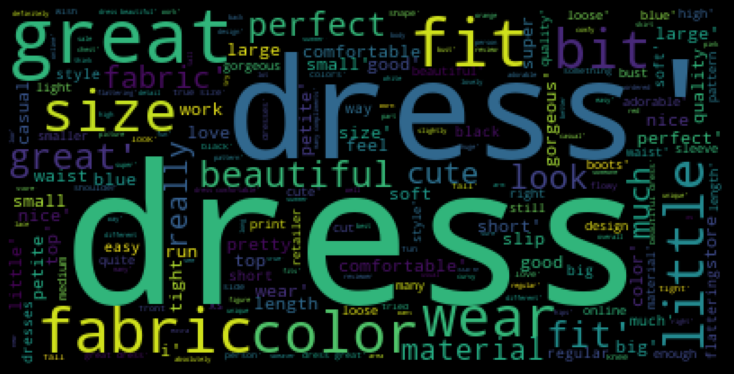

<Figure size 432x288 with 0 Axes>

In [153]:
pos_df=df[df["Sentiment"]=="Positive"]
text = pos_df['Label_tags'].values 

from wordcloud import WordCloud
# wordcloud = WordCloud().generate(pos_words)

# wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
#                       max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
wordcloud = WordCloud().generate(str(text))
def plot_Cloud(wordCloud):
    plt.figure( figsize=(10,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')
plot_Cloud(wordcloud)

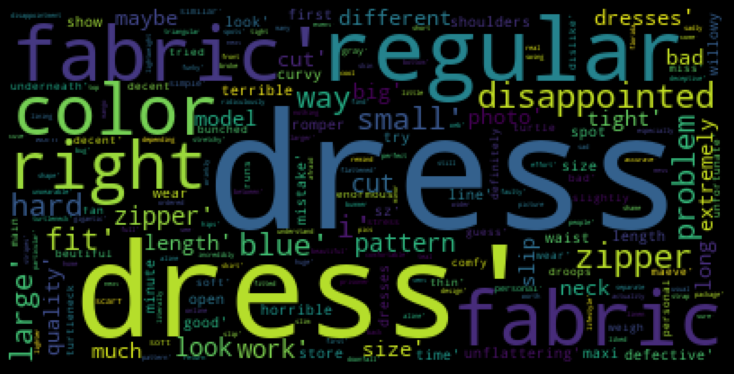

<Figure size 432x288 with 0 Axes>

In [154]:
Neg_df=df[df["Sentiment"]=="Negative"]
text = Neg_df['Label_tags'].values 

from wordcloud import WordCloud
# wordcloud = WordCloud().generate(pos_words)

# wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
#                       max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
wordcloud = WordCloud().generate(str(text))
def plot_Cloud(wordCloud):
    plt.figure( figsize=(10,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')
plot_Cloud(wordcloud)

# **WordCloud - Repetition of words**

In [ ]:
#Checking Positive and Negative dataframe length
pos_df = df[df.label== 1]
neg_df = df[df.label== 0]
# neutral=df[df.label==0]
print("lenght positive dataframe",pos_df.shape)
print("lenght negative dataframe",neg_df.shape)
# print("lenght neutral dataframe",neg_df.shape)

# neutral.head(3)

## **Preprocessing - text features**

In [ ]:
#Copying dataframe
text_prep=df.copy()
text_prep.

In [ ]:
# text_prep1['Review'] =text_prep1['Review Text']

In [ ]:
text_prep.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,label
0,767,33,,Absolutely wonderful - silky and sexy and co...,4,1,0,Initmates,Intimate,Intimates,55,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive,1
1,1080,34,,Love this dress! it's sooo pretty. i happe...,5,1,4,General,Dresses,Dresses,305,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive,1
2,1077,60,Some major design flaws,Some major design flaws I had such high hopes ...,3,0,0,General,Dresses,Dresses,524,"[major, design, flaws, high, hopes, dress, rea...",major design flaws high hopes dress really wan...,0.8779,0.735,0.038,0.227,Positive,1
3,1049,50,My favorite buy!,"My favorite buy! I love, love, love this jumps...",5,1,0,General Petite,Bottoms,Pants,141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...,0.9604,0.192,0.152,0.656,Positive,1
4,847,47,Flattering shirt,Flattering shirt This shirt is very flattering...,5,1,6,General,Tops,Blouses,209,"[flattering, shirt, shirt, flattering, due, ad...",flattering shirt shirt flattering due adjustab...,0.9274,0.471,0.000,0.529,Positive,1


In [ ]:
#Function for Removing special characters
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [ ]:
#Passing Review text to punctuation_removal function 
text_prep['Review Text'] = text_prep['Review Text'].apply(punctuation_removal)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,tokenized,tokenized_unlist,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,label,review_pos_tags
0,767,33,,wonderful comfortable,4,1,0,Initmates,Intimate,Intimates,55,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,0.8991,0.154,0.000,0.846,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
1,1080,34,,Love happened find im did have ordered online ...,5,1,4,General,Dresses,Dresses,305,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,0.9710,0.468,0.000,0.532,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
2,1077,60,Some major design flaws,major had such high wanted work i ordered smal...,3,0,0,General,Dresses,Dresses,524,"[major, design, flaws, high, hopes, dress, rea...",major design flaws high hopes dress really wan...,0.8779,0.735,0.038,0.227,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
3,1049,50,My favorite buy!,favorite love love fabulous wear i get great,5,1,0,General Petite,Bottoms,Pants,141,"[favorite, buy, love, love, love, jumpsuit, fu...",favorite buy love love love jumpsuit fun flirt...,0.9604,0.192,0.152,0.656,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
4,847,47,Flattering shirt,Flattering is flattering due adjustable is per...,5,1,6,General,Tops,Blouses,209,"[flattering, shirt, shirt, flattering, due, ad...",flattering shirt shirt flattering due adjustab...,0.9274,0.471,0.000,0.529,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
5,1080,49,Not for the very petite,petite love reese is petite am tall wear was i...,2,0,4,General,Dresses,Dresses,512,"[petite, love, tracy, reese, dresses, one, pet...",petite love tracy reese dresses one petite fee...,0.9153,0.738,0.000,0.262,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
6,858,39,Cagrcoal shimmer fun,aded last see look i went am pale is gorgeous ...,5,1,1,General Petite,Tops,Knits,517,"[cagrcoal, shimmer, fun, aded, basket, hte, la...",cagrcoal shimmer fun aded basket hte last mint...,0.8173,0.784,0.044,0.172,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
7,858,39,"Shimmer, surprisingly goes with lots",goes ordered had try used top pair went is nic...,4,1,4,General Petite,Tops,Knits,519,"[shimmer, surprisingly, goes, lots, ordered, c...",shimmer surprisingly goes lots ordered carbon ...,0.7089,0.807,0.039,0.155,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
8,1077,24,Flattering,Flattering love get runs little ordered flatte...,5,1,0,General,Dresses,Dresses,177,"[flattering, love, dress, usually, get, runs, ...",flattering love dress usually get runs little ...,0.8316,0.614,0.000,0.386,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."
9,1077,34,Such a fun dress!,Such ordered make sure wasnt long wear xs bust...,5,1,0,General,Dresses,Dresses,378,"[fun, dress, lbs, ordered, petite, make, sure,...",fun dress lbs ordered petite make sure length ...,0.9732,0.526,0.000,0.474,Positive,1,"[(wonderful, 'ADJ'), (comfortable, 'ADJ'), (Lo..."


In [ ]:
#Part of Speech filter:¶(Verbs and Adjectives)
def adj_collector(review_string):
    new_string=[]
    review_string = word_tokenize(review_string)
    tup_word = nltk.pos_tag(review_string)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_string.append(tup[0])  
    return ' '.join(new_string)

In [ ]:
#Passing "Review text" to adj_collector function to get the Verbs and Adjectives
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
text_prep['Review Text'] = text_prep['Review Text'].apply(adj_collector)
text_prep['Review Text'].head(7)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0                                wonderful comfortable
1    Love happened find im did have ordered online ...
2    major had such high wanted work i ordered smal...
3         favorite love love fabulous wear i get great
4    Flattering is flattering due adjustable is per...
5    petite love reese is petite am tall wear was i...
6    aded last see look i went am pale is gorgeous ...
Name: Review Text, dtype: object

In [ ]:
pos_df = text_prep[text_prep.label== 1]
neg_df = text_prep[text_prep.label== 0]
# neu_df= text_prep[text_prep.label==0]
# neu_df

In [ ]:
#Storing Positive and Negative words into Lists to use for wordcloud
pos_words =[]
neg_words = []
# neu_words=[]

for review in pos_df["Review Text"]:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df["Review Text"]:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]


# for review in neu_df["Review Text"]:
#     neu_words.append(review)
# neu_words = ' '.join(neu_words)
# neu_words[:400]


'broke broke first wore disappointing love going try replace annoying big looked unflattering am petite work is thin poor felt thin top are terrible little have been returned thin was torn return going is thin thought be cozy be normal light swing come special pictured i received had little was white red was fine was equals bigso soft have exchanged wanted wear i tend wear large is big had piling i'

# **Positive reviews wordcloud**

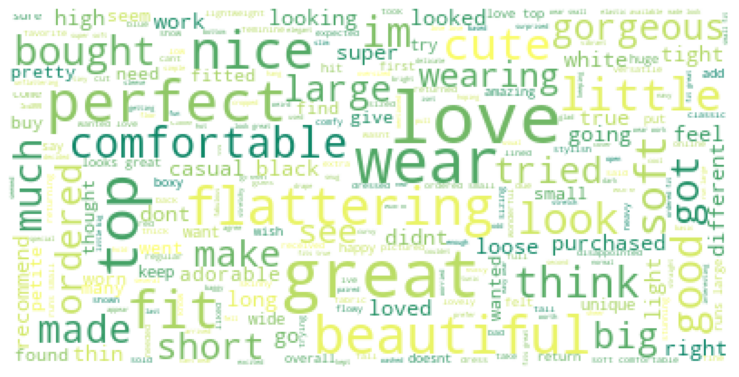

In [ ]:
# Positive reviews wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#**Negative Reviews wordcloud**

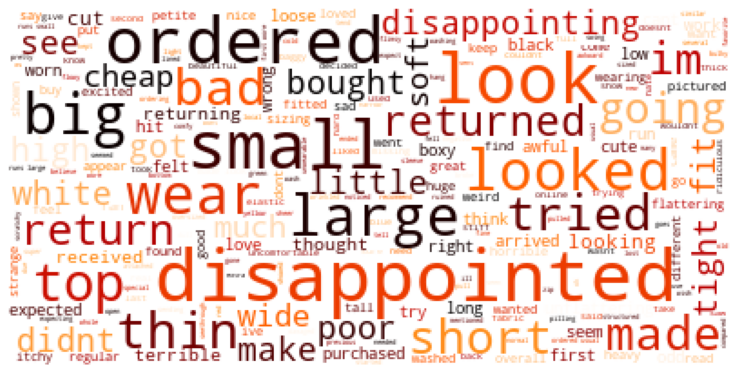

In [ ]:
#Negative reviews wordcloud
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud

<!-- ## **Neutral Reviews wordcloud** -->

In [ ]:
# wordcloud = WordCloud().generate(neu_words)

# wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
#                       max_font_size=40, relative_scaling=.5).generate(neg_words)
# plt.figure(figsize=(13,13))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()
# wordcloud

<!-- ## **Model training and Testing for Label (sentiment) generation** -->

In [80]:
# #Loading dataframe for model training and testing
# df

In [81]:
# # Function to clean the training text
# def preProcessing(review):
#     text = review.lower()
#     text = [word.strip(string.punctuation) for word in text.split(" ")]
#     text = [word for word in text if not any(c.isdigit() for c in word)]
#     text = RegexpTokenizer(r'\w+').tokenize(str(text))
#     text = [x for x in text if x not in stopwords.words('english')]
#     text = [t for t in text if len(t) > 0]
#     review_clean = " ".join(text)
#     return(review_clean)

In [83]:
# #Created new column for cleaned text with name "Review Clean"
# df['Review Clean'] = df['Review Text'].apply(lambda x: preProcessing(x))

In [84]:
# df.to_csv("Generated_csv.csv")
# df

In [85]:
# #Importing CountVectorizer
# vectorizer = CountVectorizer()

In [86]:
# #importing SMOTE from imblearn
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()


In [87]:
# #Passing input for Enconding
# X = vectorizer.fit_transform(df['Review Clean'])
# y = df['label']
# X_smt, y_smt = smt.fit_resample(X, y)



# #Splitting training and testing data with ratio of 0.7 and 0.3
# X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=100)

In [88]:
# #Loading Models
# logisticRegression = LogisticRegression()
# naiveBayes = MultinomialNB()
# SVM = SVC()
# randomForest = RandomForestClassifier(n_estimators=50)
# neuralNetwork = MLPClassifier()
# models = [logisticRegression, naiveBayes, SVM, randomForest, neuralNetwork]

### **Trainig models ,Saving models and Testing Models**

In [89]:

# conf_matrix = []
# acc = []
# reports = []

# # For each model we are going to fit the model with the x_train and y_train.
# for model in models:
#     save_model=str(model)
#     print()
#     model.fit(X_train, y_train)
#     with open(save_model+'.pkl','wb') as f:
#       pickle.dump(model,f)

    
#     # Predict 
#     predictions = model.predict(X_test)
    
#     # Get the accuracy of the predictions that the model has made.
#     accuracy = round(accuracy_score(y_test, predictions)*100)
    
#     # Save the confusion_matrix for each model
#     model_cm = confusion_matrix(y_test.values, predictions)
    
#     # Save the classification_report for each model
#     report = classification_report(y_test, predictions)
    
#     conf_matrix.append(model_cm)
#     acc.append(accuracy)
#     reports.append(report)

In [91]:
# #Accuracy of Each Model
# from prettytable import PrettyTable

# model_accuracy = PrettyTable()

# model_accuracy.add_column("Model", ['Logistic Regresion', 'Naive Bayes', 'SVM', 'Random Forest', 'Neural Network'])
# model_accuracy.add_column("Accuracy", acc)
# print(model_accuracy)

In [92]:
# # Loading trained model and its score by passing testing data
# with open('SVC().pkl', 'rb') as f:
#     loaded_model = pickle.load(f)
# result = loaded_model.score(X_test, y_test)
# result

In [93]:
# #Confusion Matrix for all models
# def plot_confusionMatrix(conf_matrix):
#     plt.figure(figsize=(15,12))
#     plt.subplot(2,2,1)
#     plt.title("Logistic Regression Confusion Matrix")
#     sns.heatmap(conf_matrix[0], annot = True, cmap="OrRd", fmt='.0f', cbar=False);

#     plt.figure(figsize=(15,12))
#     plt.subplot(2,2,1)
#     plt.title("Naive Bayes Confusion Matrix")
#     sns.heatmap(conf_matrix[1], annot = True, cmap="OrRd", fmt='.0f', cbar=False);

#     plt.figure(figsize=(15,12))
#     plt.subplot(2,2,1)
#     plt.title("SVM Confusion Matrix")
#     sns.heatmap(conf_matrix[2], annot = True, cmap="OrRd", fmt='.0f', cbar=False);

#     plt.figure(figsize=(15,12))   
#     plt.subplot(2,2,1)
#     plt.title("Random Forest Confusion Matrix")
#     sns.heatmap(conf_matrix[3], annot = True, cmap="OrRd", fmt='.0f', cbar=False);

#     plt.figure(figsize=(15,12))   
#     plt.subplot(2,2,2)
#     plt.title("Neural Network Confusion Matrix")
#     sns.heatmap(conf_matrix[4], annot = True, cmap="OrRd", fmt='.0f',cbar=False);
    
#     plt.show() 

In [94]:
# plot_confusionMatrix(conf_matrix)

# **Conclusion**
We can use the SVM model for Automatic labels generation with **which** we got the better accuracy.